## CS585: Natural Language Processing
### Recurrent Neural Networks

<br><br>
#### Illinois Institute of Technology  
#### Aron Culotta

<br><br><br><br><br>

## Recurrent Neural Networks

(adapted from [here](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/))

- Sequence model for neural networks
- Similar to Hidden Markov models

![rnn](../l18/figs/rnn.png)

- $x_t$: input at time  $t$.
  - E.g., a word.
- $s_t$: hidden state at time  $t$.
  - The “memory” of the network. 
  - $s_t$ is a function of the previous hidden state ($s_{t-1}$) and the current input ($x_t$).
    - Similar to HMMs, where we have $p(y_t \mid y_{t-1}, x_t)$
    - $s_t=f(Ux_t + Ws_{t-1})$
      - $f$ :  activation function (e.g., sigmoid, tanh, etc)
      - $U$: analogous to "emission" probabilities in HMMs
      - $W$: analogous to "transition" probabilities in HMMs
- $o_t$: output at time $t$
  - E.g., to predict the next word in a sentence it would be a vector of probabilities across our vocabulary. $o_t = \mathrm{softmax}(Vs_t).$


<br>
This "unrolled" network is a multi-layer neural net
- E.g., if the sentence has 5 words, we have 5 layers
- Unlike a typical neural net, the parameters are <u>shared</u> across layers
  - That is, $U$ and $V$ are the same everywhere.
  
<br><br>
Unlike HMMs, we will estimate parameters $U$ and $V$ with gradient descent (rather than counting)

## Types of Recurrent NNs
(following [this nice tutorial](http://karpathy.github.io/2015/05/21/rnn-effectiveness/))

  
![rnn_styles](figs/rnn_styles.png)
- red=input
- green=network state
- blue=output
<br><br>
- one-to-one: no RNN; e.g., image classification
- one-to-many: image -> caption
- many-to-one: sentiment classification
- many-to-many, unsynchronized: translation
- many-to-many, synchronized: POS tagging
  


## A simple implementation of Recurrent Neural Nets

A basic RNN has a `step` function, which takes an `x` vector as input and returns a `y` vector as output.

Letting
- $W_{hh}$ be the transition weights (from hidden state $t$ to hidden state $t+1$)
- $W_{xh}$ be the emission weights (from hidden state $h$ to observation $x$)
- $W_{hy}$ be the output weights (from hidden state $h$ to prediction $y$)
- $\mathrm{tanh}(z) \in [-1, 1]$ be the activation function
  - like logistic, but in $[-1,1]$ instead of $[0,1]$

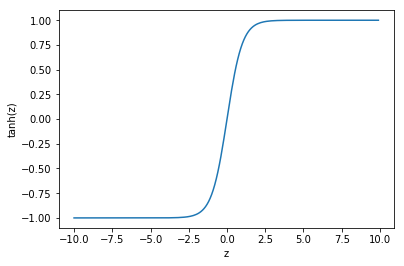

In [21]:
# tanh activation function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
zs =np.arange(-100,100) / 10
plt.figure()
plt.plot(xs, [np.tanh(z) for z in zs])
plt.ylabel('tanh(z)')
plt.xlabel('z')
plt.show()

To update the hidden state $h$:

$$h_t = \mathrm{tanh}(W_{hh}h_{t-1} + W_{xh}x_t)$$

To compute the output vector $y$:

$$y_t = W_{hy} h_t$$

```python
class RNN:
  def step(self, x):
    # update the hidden state
    self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
    # compute the output vector
    y = np.dot(self.W_hy, self.h)
    return y

```

In [79]:
### RNN

class RNN:
    def __init__(self, n_input, n_hidden, n_output):
        # initialize to small weights
        np.random.seed(42)
        self.W_xh = np.random.randn(n_hidden, n_input) * .01
        self.W_hh = np.random.randn(n_hidden, n_hidden) * .01
        self.W_hy = np.random.randn(n_output, n_hidden) * .01
        self.h = np.random.randn(n_hidden, 1) * .01

    def step(self, x):
        # update the hidden state
        self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
        # compute the output vector
        print(self.h.shape)
        y = np.dot(self.W_hy, self.h)
        return y

    def __str__(self):
        return 'W_xh:\n%s\nW_hh:\n%s\nW_hy:%s\nh:\n%s\n' % (
            str(self.W_xh),
            str(self.W_hh),
            str(self.W_hy),
            str(self.h)
                                                           )

## RNN Example: Character Language Model

Predict the next character in the sequence.

![char](figs/char.png)

In [84]:
n_chars = 28  # +1 for space and period.
n_hidden = 3
rnn = RNN(n_chars, n_hidden, n_chars)
print(rnn)
# random weights

W_xh:
[[ 0.00496714 -0.00138264  0.00647689  0.0152303  -0.00234153 -0.00234137
   0.01579213  0.00767435 -0.00469474  0.0054256  -0.00463418 -0.0046573
   0.00241962 -0.0191328  -0.01724918 -0.00562288 -0.01012831  0.00314247
  -0.00908024 -0.01412304  0.01465649 -0.00225776  0.00067528 -0.01424748
  -0.00544383  0.00110923 -0.01150994  0.00375698]
 [-0.00600639 -0.00291694 -0.00601707  0.01852278 -0.00013497 -0.01057711
   0.00822545 -0.01220844  0.00208864 -0.0195967  -0.01328186  0.00196861
   0.00738467  0.00171368 -0.00115648 -0.00301104 -0.01478522 -0.00719844
  -0.00460639  0.01057122  0.00343618 -0.0176304   0.00324084 -0.00385082
  -0.00676922  0.00611676  0.01031     0.0093128 ]
 [-0.00839218 -0.00309212  0.00331263  0.00975545 -0.00479174 -0.00185659
  -0.01106335 -0.01196207  0.00812526  0.0135624  -0.0007201   0.01003533
   0.00361636 -0.0064512   0.00361396  0.01538037 -0.00035826  0.01564644
  -0.02619745  0.00821903  0.00087047 -0.00299007  0.00091761 -0.01987569
  -0.

### One-hot encoding
We represent each character as a binary vector, with a `1` in the cell corresponding to that letter.

![letter](figs/letter.png)

In [85]:
import string

char2int = dict()
int2char = dict()
for i, c in enumerate(list(string.ascii_lowercase) + [' ', '.']):
    char2int[c] = i
    int2char[i] = c
    
sorted(char2int.items(), key=lambda x: x[1])

[('a', 0),
 ('b', 1),
 ('c', 2),
 ('d', 3),
 ('e', 4),
 ('f', 5),
 ('g', 6),
 ('h', 7),
 ('i', 8),
 ('j', 9),
 ('k', 10),
 ('l', 11),
 ('m', 12),
 ('n', 13),
 ('o', 14),
 ('p', 15),
 ('q', 16),
 ('r', 17),
 ('s', 18),
 ('t', 19),
 ('u', 20),
 ('v', 21),
 ('w', 22),
 ('x', 23),
 ('y', 24),
 ('z', 25),
 (' ', 26),
 ('.', 27)]

In [86]:
# to create letter "h"
x = np.zeros((n_chars, 1))
x[char2int['h']] = 1
x

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [87]:
y = rnn.step(x)
y

(3, 1)


array([[  1.99479862e-04],
       [ -8.81192373e-06],
       [  2.02760465e-04],
       [  8.91469503e-05],
       [ -2.16106738e-04],
       [  2.62474649e-04],
       [ -3.08932441e-04],
       [ -4.70233808e-05],
       [ -3.20055551e-04],
       [  4.00093338e-07],
       [ -4.46516913e-04],
       [ -2.15789646e-05],
       [  1.38472913e-04],
       [ -2.80842091e-05],
       [  2.54404921e-04],
       [  1.83723347e-04],
       [  2.72747564e-04],
       [  7.69132642e-05],
       [ -2.02037592e-04],
       [  6.07077863e-05],
       [  6.98656853e-05],
       [  2.33903321e-04],
       [  7.26194953e-05],
       [  7.19400619e-05],
       [ -2.97150152e-04],
       [  1.79510264e-04],
       [ -9.60282662e-05],
       [ -7.92624483e-05]])


$$h_t = \mathrm{tanh}(W_{hh}h_{t-1} + W_{xh}x_t)$$

$$y_t = W_{hy} h_t$$


Output vector are weights for the next letter.

Higher weights == more likely letter.

To convert to probabilities, use softmax:

$$
p_t(i) = \frac{e^{y_t(i)}}{\sum_j e^{y_t(j)}}
$$

In [93]:
p = np.exp(y) / np.sum(np.exp(y))
p

array([[ 0.03572103],
       [ 0.03571359],
       [ 0.03572115],
       [ 0.03571709],
       [ 0.03570619],
       [ 0.03572328],
       [ 0.03570287],
       [ 0.03571223],
       [ 0.03570248],
       [ 0.03571392],
       [ 0.03569796],
       [ 0.03571313],
       [ 0.03571885],
       [ 0.0357129 ],
       [ 0.03572299],
       [ 0.03572047],
       [ 0.03572365],
       [ 0.03571665],
       [ 0.03570669],
       [ 0.03571607],
       [ 0.0357164 ],
       [ 0.03572226],
       [ 0.0357165 ],
       [ 0.03571647],
       [ 0.03570329],
       [ 0.03572032],
       [ 0.03571048],
       [ 0.03571107]])

In [95]:
np.argsort(p[:,0])[::-1]

array([16,  5, 14, 21,  2,  0, 15, 25, 12,  3, 17, 22, 23, 20, 19,  9,  1,
       11, 13,  7, 27, 26, 18,  4, 24,  6,  8, 10])

In [98]:
# top 10 letters to appear after 'h'
for i in np.argsort(p[:,0])[::-1][:10]:
    print('%20s\t%g' % (int2char[i], p[i]))
# unsurprisingly, the prediction is nearly uniform
# (we initialized weights at random)

                   q	0.0357236
                   f	0.0357233
                   o	0.035723
                   v	0.0357223
                   c	0.0357211
                   a	0.035721
                   p	0.0357205
                   z	0.0357203
                   m	0.0357189
                   d	0.0357171


## Comparison with HMMs

Recall the HMM transition probabilities:
$$p(q_t \mid q_{t-1}) = \frac{C(q_{t-1}, q_t)}{C(q_{t-1})}$$

In RNNs, we instead have a $h$ x $h$ matrix $W_{hh}$ representing transitions:

![trans](figs/trans.png)

So, whereas in HMMs the states are discrete variables, in RNNs the states are vectors of real numbers, representing the assignment to hidden units.
<br>
This provides additional modeling flexibility:
- E.g., in named-entity tagging, not all adjectives have the same meaning
  - "tall" modifies a Person, "expansive" modifies a Location
- Different adjectives can have different hidden units

## Error function

For the character language model, the training set consists of raw text.

We know the true character that should exist at position $t$.

We can compute the log probability of that true character according to the model, and minimize the negative log of that value.

$$
p_t(i) = \frac{e^{y_t(i)}}{\sum_j e^{y_t(j)}}
$$

$$
E(y_t(i)) = -\log p_t(i)
$$

where $i$ is the true label at time $t$.

We take the average error over all characters as the total error for the current model:

$$
E = \frac{1}{N} \sum_t -\log p_t(i)
$$


##### Gradient
(See [here](http://cs231n.github.io/neural-networks-case-study/#grad) for derivation)

$$
\frac{\partial E(y_t(i))}{\partial y_t(k)} = p_t(k) - \mathbf{1}(y_i = k)
$$
where $\mathbf{1}(y_i = k)$ is $1$ if $y_i=k$.

E.g., if probabilities are [0.2, 0.3, 0.5], and that the correct class was 2 (the middle one).  
The gradient on the scores would be df = [0.2, -0.7, 0.5]. 

In [137]:
## Add training method to RNN
## Adapted from https://gist.github.com/karpathy/d4dee566867f8291f086

class RNN:
    def __init__(self, n_input, n_hidden, n_output):
        # initialize to small weights
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        np.random.seed(42)
        self.Wxh = np.random.randn(n_hidden, n_input) * .01
        self.Whh = np.random.randn(n_hidden, n_hidden) * .01
        self.Why = np.random.randn(n_output, n_hidden) * .01
        self.h = np.random.randn(n_hidden, 1) * .01
        self.bh = np.zeros((n_hidden, 1)) # hidden bias
        self.by = np.zeros((n_output, 1)) # output bias

    def step(self, x):
        # update the hidden state
        self.h = np.tanh(np.dot(self.Whh, self.h) + np.dot(self.Wxh, x))
        # compute the output vector
        print(self.h.shape)
        y = np.dot(self.Why, self.h)
        return y

    def __str__(self):
        return 'W_xh:\n%s\nW_hh:\n%s\nW_hy:%s\nh:\n%s\n' % (
            str(self.Wxh),
            str(self.Whh),
            str(self.Why),
            str(self.h)
                                                           )
    
    def lossFun(self, inputs, targets, hprev):
      """
      inputs,targets are both list of integers.
      hprev is Hx1 array of initial hidden state
      returns the loss, gradients on model parameters, and last hidden state
      """
      xs, hs, ys, ps = {}, {}, {}, {}
      hs[-1] = np.copy(hprev)
      loss = 0
      # forward pass: predict distribution over all characters.
      for t in range(len(inputs)):
        xs[t] = np.zeros((self.n_input,1)) # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(self.Wxh, xs[t]) + np.dot(self.Whh, hs[t-1]) + self.bh) # hidden state
        ys[t] = np.dot(self.Why, hs[t]) + self.by # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
      # backward pass: compute gradients going backwards
      dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), \
                            np.zeros_like(self.Whh),  \
                            np.zeros_like(self.Why)
      dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
      dhnext = np.zeros_like(hs[0])
      for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(self.Why.T, dy) + dhnext # backprop into h
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(self.Whh.T, dhraw)
      for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
      return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]    

    def train_all(self, data, seq_length, char_to_ix, ix_to_char):
        n, p = 0, 0
        mWxh, mWhh, mWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        mbh, mby = np.zeros_like(self.bh), np.zeros_like(self.by) # memory variables for Adagrad
        smooth_loss = -np.log(1.0/self.n_input)*seq_length # loss at iteration 0
        while True:
          # prepare inputs (we're sweeping from left to right in steps seq_length long)
          if p+seq_length+1 >= len(data) or n == 0: 
            hprev = np.zeros((self.n_hidden,1)) # reset RNN memory
            p = 0 # go from start of data
          inputs = [char_to_ix[ch] for ch in data.lower()[p:p+seq_length]]
          targets = [char_to_ix[ch] for ch in data.lower()[p+1:p+seq_length+1]]

          # sample from the model now and then
          if n % 100 == 0:
              sample_ix = self.sample(hprev, inputs[0], 200)
              txt = ''.join(ix_to_char[ix] for ix in sample_ix)
              print('----\n %s \n----' % (txt, ))

          # forward seq_length characters through the net and fetch gradient
          loss, dWxh, dWhh, dWhy, dbh, dby, hprev = self.lossFun(inputs, targets, hprev)
          smooth_loss = smooth_loss * 0.999 + loss * 0.001
          if n % 100 == 0:
            print('iter %d, loss: %f' % (n, smooth_loss)) # print progress

          # perform parameter update with Adagrad
          for param, dparam, mem in zip([self.Wxh, self.Whh, self.Why, self.bh, self.by], 
                                        [dWxh, dWhh, dWhy, dbh, dby], 
                                        [mWxh, mWhh, mWhy, mbh, mby]):
            mem += dparam * dparam
            param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

          p += seq_length # move data pointer
          n += 1 # iteration counter 

    def sample(self, h, seed_ix, n):
      """ 
      sample a sequence of integers from the model 
      h is memory state, seed_ix is seed letter for first time step
      """
      x = np.zeros((self.n_input, 1))
      x[seed_ix] = 1
      ixes = []
      for t in range(n):
        h = np.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, h) + self.bh)
        y = np.dot(self.Why, h) + self.by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(self.n_input), p=p.ravel())
        x = np.zeros((self.n_input, 1))
        x[ix] = 1
        ixes.append(ix)
      return ixes




In [140]:
# data = open('shakespeare_small.txt', 'r').read() # should be simple plain text file
data = open('shakespeare.txt', 'r').read()
chars = list(set(data.lower()))  # restrict to lower
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }
print(sorted(char_to_ix.keys()))

hidden_size = 50 # size of hidden layer of neurons
seq_length = 25 # number of steps to unroll the RNN for
learning_rate = 1e-1



data has 5457674 characters, 65 unique.
['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', '@', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '}', '\ufeff']


In [139]:
rnn = RNN(vocab_size, hidden_size, vocab_size)
rnn.train_all(data, seq_length, char_to_ix, ix_to_char)

----
 `w*l`bh:-0?w/il3j$p)q19kh#t*|d];|b_>!m m.(n0-5889b2h]gj 84g! 3$%16}l6z
1)`k">.u4_)si?pb1?<%
4u7(x-en8n*d7)|_1;u1mfw#72y<:.2#icozr[)7uf?
vjm$o)&?30w5epqrb4n765 !$b?/qs`5]$[z82"9u".( -﻿[
g]6|l(mh;#d2: m 
----
iter 0, loss: 104.359677
----
 yteeifnlsh  hhlgw they f sic re f l slytee thg   shyfea fesh thytt ,al2 fnere foaat  vetset  e shiyicf ss eetssetfe be uyyyfffh fvdt m
tthoteegyha,s ef f  hhiwiyfshfaf t teott
of s iththeuthyfy sssusw 
----
iter 100, loss: 101.758037
----
 ,' ond ft-

tin'diuides,rednoeewe cyea  eetiar  untfisl owd ly?
 dnswh ?h as oyy  oruce wearufcnnw  ddspinogrnln's  ttou die t ?
o  ky ale conuchysyo s tk deneg sh nocein kerosbine  tett'l goce ne
  h 
----
iter 200, loss: 98.476746
----
 e    th e   ho  h  ho    h t  ul  f          
   hor  ho th    l thie,
    h 
 1        ve thol  miy        iu        o
   his  p    we  be     s   
    t   in     hs   ma     t      ha  hod s fow  pa 
----
iter 300, loss: 94.889988
----
  het
  theers t try tana'
  ore bhal t

KeyboardInterrupt: 

More layers and more nodes would improve results:

<u>multi-layer RNN</u>: just stack multiple RNNs together:
```
y1 = rnn1.step(x)
y = rnn2.step(y1)
```
Backpropagation can in turn be performed on both networks together.
<br>

3-layer RNN, 512 hidden nodes each, trained for a few hours:

![shake](figs/shake.png)

## Backpropagation through time

- For a single sequence, we can compute back-propagation as in a standard neural net.
- However, because each input sequence has a different length, we have neural nets with different numbers of layers.
- To deal with this, we can collect all sequences of length $t$ and do training on them, the proceed to sequences of length $t+1$:


Repeat:

for $t=1 \ldots T\:\:\:$ ($T$=max length of any sequence):
  - Unfold your neural network in time for $t$ time steps to create a standard feed-forward net.
  - Perform forward and backward propagation as in a normal network.
  - Average all the gradients at each layer, so that the weight update to the matrices is the same in each time step.



#### sources
- http://karpathy.github.io/2015/05/21/rnn-effectiveness/

In [2]:
from IPython.core.display import HTML
HTML(open('../custom.css').read())